In [1]:
#hide
import fastbook
from fastbook import *
from fastai.vision.widgets import *

/Users/abhgpta/miniconda3/lib/python3.12/site-packages/fastbook/__init__.py:13: UserWarning: Missing `sentencepiece` - please run `pip install 'sentencepiece<0.1.90'`
  except ModuleNotFoundError: warn("Missing `sentencepiece` - please run `pip install 'sentencepiece<0.1.90'`")


In [2]:
ims = search_images_ddg('grizzly bear')
len(ims)

200

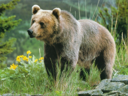

In [3]:
# Quick sanity check
dest = 'images/grizzly.jpg'
download_url(ims[1], dest, show_progress=False)
im = Image.open(dest)
im.to_thumb(128, 128)

In [4]:
bear_types = 'grizzly', 'black', 'teddy'
path = Path('bears')
if not path.exists():
    path.mkdir()
    for b in bear_types:
        dest = path/b
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{b} bear')
        download_images(dest, urls=results)

In [5]:
# Remove bad images
fns = get_image_files(path)
failed = verify_images(fns)
failed.map(Path.unlink)


(#0) []

In [8]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [9]:
dls = bears.dataloaders(path)

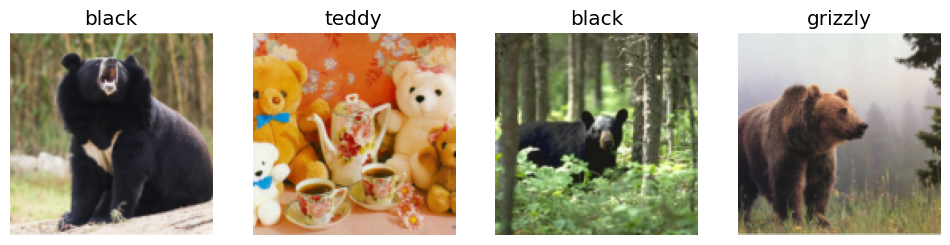

In [10]:
dls.valid.show_batch(max_n=4, nrows=1)

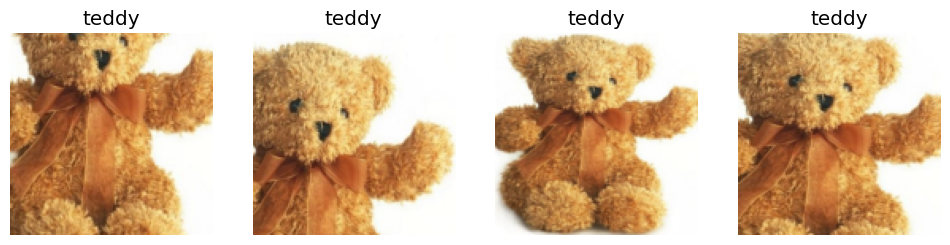

In [11]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [15]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

Could not do one pass in your dataloader, there is something wrong in it. Please see the stack trace below:


NotImplementedError: The operator 'aten::_linalg_solve_ex.result' is not currently implemented for the MPS device. If you want this op to be added in priority during the prototype phase of this feature, please comment on https://github.com/pytorch/pytorch/issues/77764. As a temporary fix, you can set the environment variable `PYTORCH_ENABLE_MPS_FALLBACK=1` to use the CPU as a fallback for this op. WARNING: this will be slower than running natively on MPS.